In [214]:
import pandas as pd
import numpy as np
import os
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
df = pd.read_csv("Song_Data_Final.csv")

In [216]:
suc = df[df["is_success"] == 1]
notsuc = df[df['is_success'] == 0]
suc

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,is_success
23,5977,0.01440,['Joe Diffie'],0.559,210693,0.639,0,7r45fN7xpmDIOxKIyPb6qb,0.000001,10,...,-5.087,1,A Night To Remember,39,1999-06-01,0.0272,75.478,0.2340,1999,1
24,5978,0.02440,['Vitamin C'],0.651,237760,0.760,0,5Xkvi3GZeRGah9e5px61gG,0.000088,2,...,-7.472,1,Smile,41,1999-08-31,0.2430,190.365,0.5060,1999,1
76,6030,0.00328,['Blaque'],0.867,306693,0.420,0,1Pqv7l6vxjBxd5fx4bWchC,0.000003,1,...,-9.478,1,808,40,1999-05-28,0.1670,121.660,0.3670,1999,1
130,6084,0.10100,['Billy Gilman'],0.442,249840,0.447,0,3ZdA3QuqHqOJdsczRwT1hg,0.000000,0,...,-8.838,1,One Voice,39,2000-06-14,0.0252,149.652,0.1600,2000,1
134,6088,0.42500,['Kelly Price'],0.577,380333,0.349,0,5FX8KqBY74jLl0BBTSNl2N,0.000000,8,...,-7.770,1,As We Lay,40,2000-01-01,0.0312,124.010,0.1310,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41874,169783,0.07990,"['Sia', 'Diplo', 'Labrinth', 'LSD']",0.603,213707,0.615,0,4xigPf2sigSPmuFH3qCelB,0.000067,11,...,-4.931,0,"Genius (feat. Sia, Diplo, and Labrinth)",75,2019-04-12,0.1650,158.657,0.5610,2019,1
41878,169787,0.70400,"['Ariana Grande', 'Victoria Monét']",0.892,158587,0.507,1,6tsOcBnaKgzK22yEiqRh8P,0.000031,0,...,-8.282,1,MONOPOLY (with Victoria Monét),70,2019-04-01,0.3780,143.960,0.6950,2019,1
41879,169788,0.85300,['Billie Eilish'],0.696,270520,0.332,0,7tGEAA1f8MydT7eVbbO9Zy,0.433000,6,...,-12.834,1,WHEN I WAS OLDER - Music Inspired By The Film ...,71,2019-01-09,0.0425,150.130,0.0628,2019,1
41886,169795,0.10700,['Juice WRLD'],0.664,156621,0.832,1,0baYVkFX4vIXXmIuHRWXDN,0.000000,10,...,-3.166,0,Out My Way,65,2019-03-08,0.3400,164.144,0.4980,2019,1


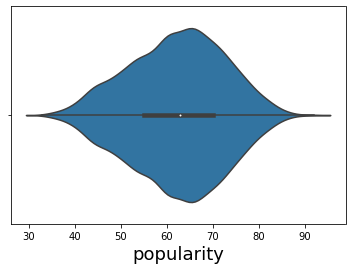

In [217]:
ax1 = sns.violinplot(x = suc["popularity"])

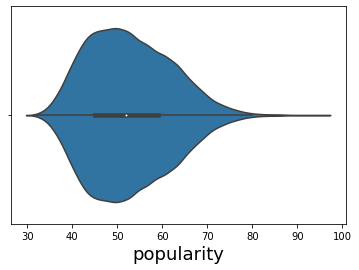

In [218]:
ax2 = sns.violinplot(x = notsuc["popularity"])

In [224]:
cols = ['acousticness', 'danceability', 'duration_ms', 'energy','explicit', 'instrumentalness','key','liveness',
       'loudness','mode','popularity','speechiness','tempo','valence']
cols

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo',
 'valence']

In [225]:
meansuc = []
meannot = []
for i in cols:
    meansuc.append(np.mean(suc[i]))
    meannot.append(np.mean(notsuc[i]))

In [226]:
means = pd.DataFrame(np.array([meansuc,meannot]),
                   columns=cols)
means

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.165943,0.637313,227775.871985,0.686502,0.339902,0.00774,5.259026,0.182565,-5.904010,0.652846,62.258868,0.108473,122.516487,0.503077
1,0.274020,0.578668,234224.931884,0.638223,0.189020,0.08683,5.251287,0.195209,-7.680813,0.673820,52.654330,0.092076,120.742076,0.499959


In [227]:
meandiff = []
for i in cols:
    meandiff.append(100*(means[i][0]-means[i][1])/means[i][1]) #bar plot data

In [228]:
meandiff

[-39.44138881167473,
 10.134504480011014,
 -2.753361842088377,
 7.564552945916097,
 79.8230093975781,
 -91.08553263144198,
 0.14737399863636322,
 -6.477525727375302,
 -23.133007247963988,
 -3.1126799416921305,
 18.240738104996467,
 17.807086862593884,
 1.4695882241484226,
 0.6237396933489984]

In [229]:
pd.DataFrame(np.array([meandiff]),
                   columns=cols)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,-39.441389,10.134504,-2.753362,7.564553,79.823009,-91.085533,0.147374,-6.477526,-23.133007,-3.11268,18.240738,17.807087,1.469588,0.62374


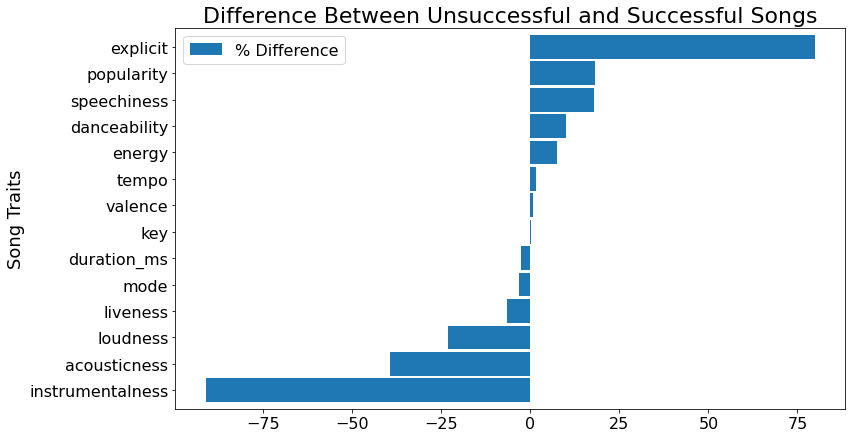

In [230]:
growthData = {"Song Traits": ['instrumentalness', 'acousticness', 'loudness', 'liveness', 'mode', 'duration_ms', 
                            'key', 'valence','tempo','energy','danceability','speechiness','popularity','explicit'],

              "% Difference":[-91.08553263, -39.44138881,-23.13300725,-6.47752573,-3.11267994,-2.75336184,
                              0.147374,0.62373969, 1.46958822,7.56455295,10.13450448,17.80708686,18.2407381,79.8230094]};

dataFrame  = pd.DataFrame(data = growthData);
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
dataFrame.plot.barh(x='Song Traits', y='% Difference', title="Difference Between Unsuccessful and Successful Songs",figsize = (12,7),width = 0.9);
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16)
plt.show(block=True);

In [231]:
cols

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo',
 'valence']

Text(0.5, 1.0, 'Feature Correlation Map')

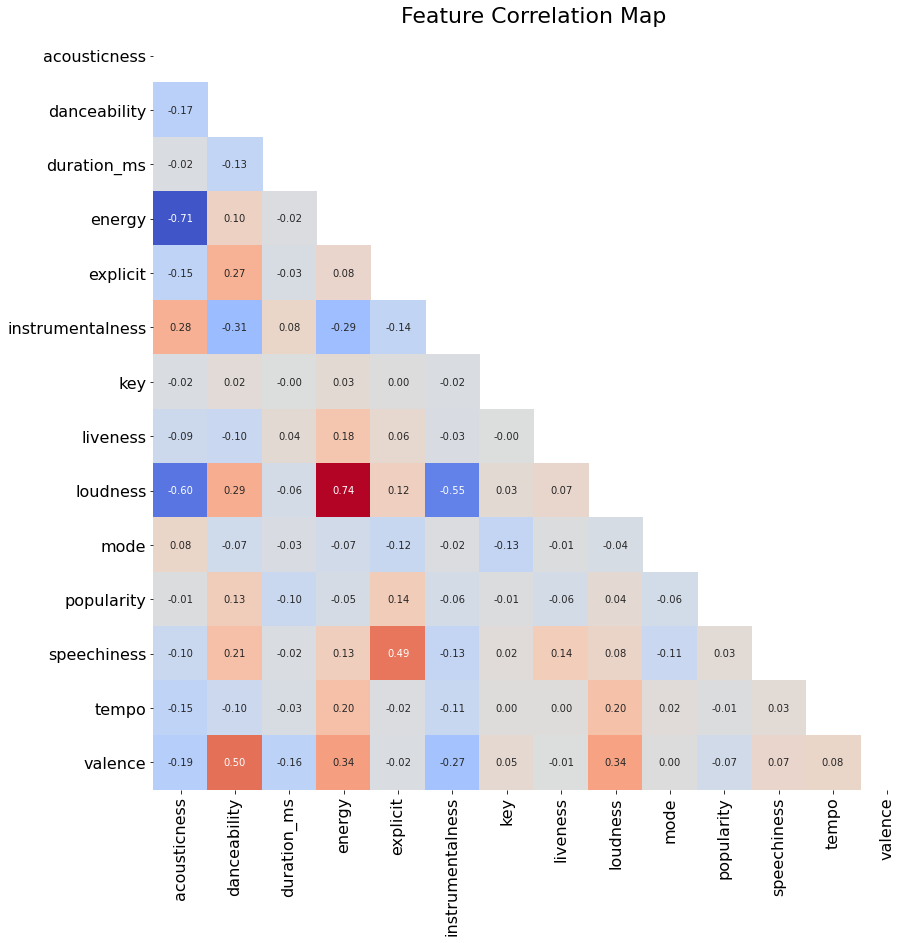

In [232]:

corr = df[cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f4, ax4 = plt.subplots(figsize=(14, 14))
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0,
            square=True, linewidths=0,vmin=-0.71, vmax=0.74,annot = True,fmt='.2f',cbar = False)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Feature Correlation Map',fontsize = 22)

In [234]:
df[cols]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.09350,0.418,549933,0.633,0,0.079000,10,0.7590,-8.138,1,41,0.0462,122.781,0.4830
1,0.65400,0.550,277467,0.487,0,0.000014,9,0.3600,-9.917,1,43,0.0892,153.896,0.7970
2,0.90200,0.572,170400,0.187,0,0.000000,6,0.2750,-14.848,1,41,0.0363,133.543,0.5130
3,0.01860,0.471,142600,0.866,0,0.002960,7,0.1170,-8.019,1,43,0.0886,120.415,0.2650
4,0.41400,0.694,326640,0.658,0,0.000483,0,0.0485,-9.215,1,53,0.0368,159.208,0.7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41895,0.26900,0.884,162895,0.546,0,0.000008,2,0.0640,-6.279,0,76,0.1170,113.236,0.4900
41896,0.06490,0.788,215227,0.427,0,0.000036,5,0.1710,-9.918,0,67,0.3080,97.038,0.6050
41897,0.00131,0.503,206147,0.568,1,0.001440,4,0.0856,-7.182,0,65,0.0341,126.935,0.0705
41898,0.52400,0.681,286507,0.648,1,0.000000,1,0.1040,-5.021,0,77,0.3800,172.019,0.6870


In [235]:
cols

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo',
 'valence']

In [236]:
normcols = ['acousticness', 'danceability','energy','instrumentalness','liveness','speechiness','valence']

In [237]:
normcols[0:-1]

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness']

In [238]:
violin_df = df.drop(columns = ['Unnamed: 0', 'artists', 'id', 'release_date','name','mode','key','is_success','explicit','year'])
violin_df['popularity'] = violin_df['popularity']/100
violin_df['duration_ms'] = violin_df['duration_ms']/max(violin_df['duration_ms'])
violin_df['loudness'] = violin_df['loudness']/min(violin_df['loudness'])
violin_df['tempo'] = violin_df['tempo']/max(violin_df['tempo'])
violin_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness',
       'tempo', 'valence'],
      dtype='object')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

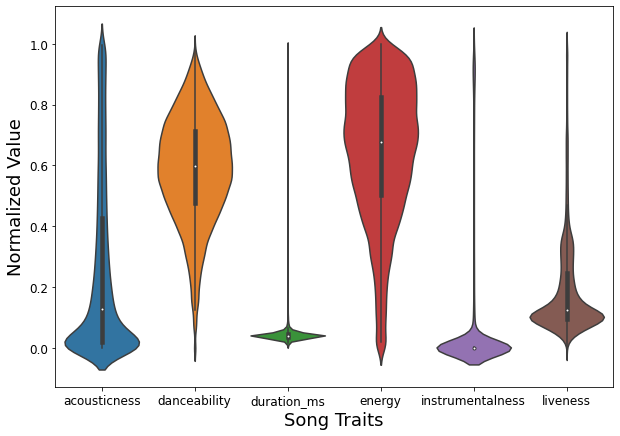

In [239]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
fig5, ax5 = plt.subplots(figsize =(10, 7)) 
sns.violinplot(ax = ax5, data = violin_df.drop(['loudness', 'popularity', 'speechiness','tempo', 'valence'],axis = 1),kd = 0.1, scale = "width")
plt.xlabel('Song Traits')
plt.ylabel('Normalized Value')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

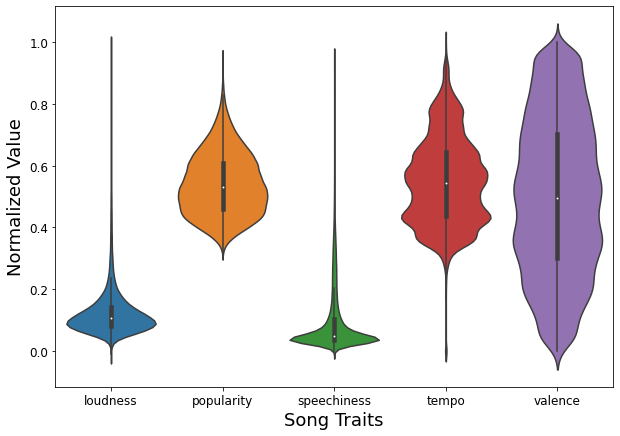

In [240]:
fig5, ax5 = plt.subplots(figsize =(10, 7)) 
sns.violinplot(ax = ax5, data = violin_df.drop(['instrumentalness', 'liveness','acousticness', 'danceability', 'duration_ms', 'energy'],axis = 1),kd = 0.1, scale = "width")
plt.xlabel('Song Traits')
plt.ylabel('Normalized Value')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [241]:
len(suc)

6343

In [242]:
len(notsuc)

35557

In [243]:
5719/(36181+5719)

0.13649164677804296

In [244]:
36181+5719

41900

In [245]:
suc[cols]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
23,0.01440,0.559,210693,0.639,0,0.000001,10,0.1400,-5.087,1,39,0.0272,75.478,0.2340
24,0.02440,0.651,237760,0.760,0,0.000088,2,0.0772,-7.472,1,41,0.2430,190.365,0.5060
76,0.00328,0.867,306693,0.420,0,0.000003,1,0.0887,-9.478,1,40,0.1670,121.660,0.3670
130,0.10100,0.442,249840,0.447,0,0.000000,0,0.0962,-8.838,1,39,0.0252,149.652,0.1600
134,0.42500,0.577,380333,0.349,0,0.000000,8,0.1340,-7.770,1,40,0.0312,124.010,0.1310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41874,0.07990,0.603,213707,0.615,0,0.000067,11,0.1170,-4.931,0,75,0.1650,158.657,0.5610
41878,0.70400,0.892,158587,0.507,1,0.000031,0,0.1090,-8.282,1,70,0.3780,143.960,0.6950
41879,0.85300,0.696,270520,0.332,0,0.433000,6,0.0848,-12.834,1,71,0.0425,150.130,0.0628
41886,0.10700,0.664,156621,0.832,1,0.000000,10,0.7760,-3.166,0,65,0.3400,164.144,0.4980
